### Comparing GARCH conditional volatility to empirical rolling window vol

In [8]:
from arch import arch_model
import pandas as pd
import yfinance
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams.update({
   "text.usetex": True,
   "font.family": ['Latin Modern Roman'],
   "xtick.labelsize": 20.0,
   "ytick.labelsize": 20.0,
   "axes.labelsize":  20.0,
   "legend.fontsize": 20.0
}) 

In [9]:
returns = yfinance.download("SPY", start="2010-01-01", end="2021-10-02")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
pct_return = returns.pct_change().iloc[1:]*100

In [11]:
pct_return

Date
2010-01-04    1.695949
2010-01-05    0.264730
2010-01-06    0.070386
2010-01-07    0.422119
2010-01-08    0.332819
                ...   
2021-09-27   -0.286092
2021-09-28   -2.015185
2021-09-29    0.168314
2021-09-30   -1.222234
2021-10-01    1.188418
Name: Adj Close, Length: 2958, dtype: float64

In [12]:
am = arch_model(pct_return)
res_vanilla = am.fit(disp="off")

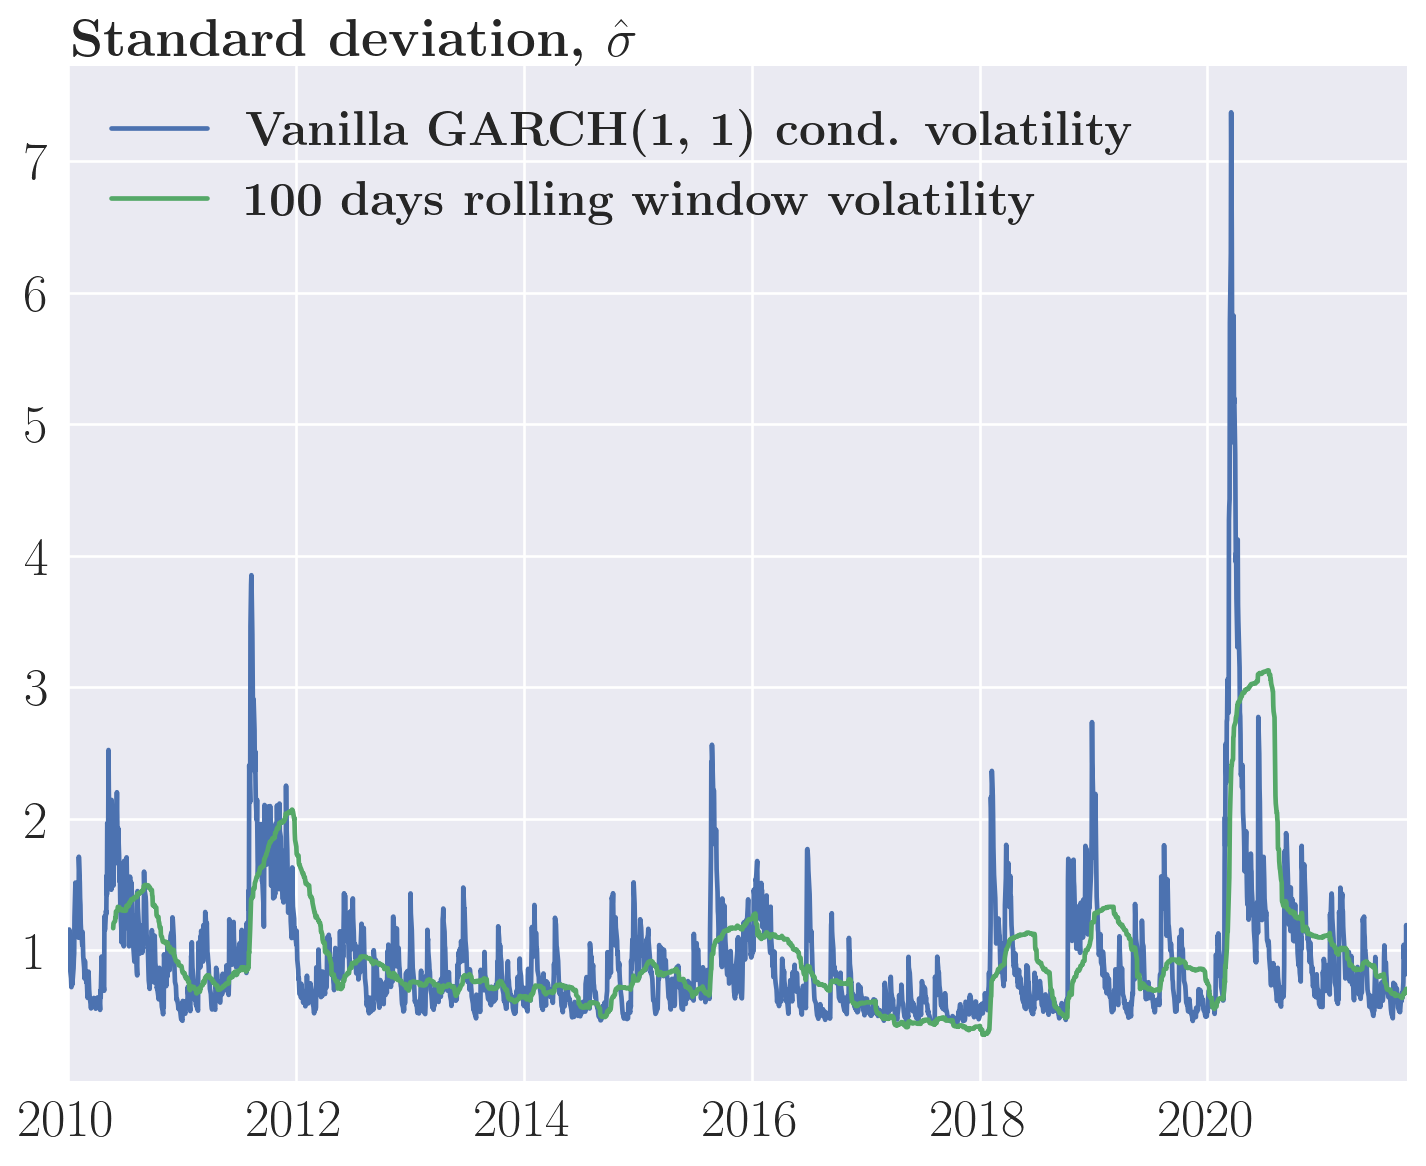

In [23]:

fig, ax = plt.subplots(1, 1, figsize=(9, 7), dpi=192)
ax.plot(res_vanilla.conditional_volatility, label=r"\textbf{Vanilla GARCH(1, 1) cond. volatility}")
ax.plot(pct_return.rolling(100).std(), label=r"\textbf{100 days rolling window volatility}")
ax.set_ylabel(r"\textbf{Standard deviation, $\hat{\sigma}$", loc='top', rotation = 0, labelpad = -230) 
ax.legend(fontsize=18)
ax.set_xlim("2010","2021-10-02")
fig.savefig("../Description of data/GarchvsEmpirical_vol.png")